In [86]:
import numpy as np
import matplotlib.pyplot as plt

## Basic parameters

In [87]:
m = 1. # mass
k = 10. # stiffness
zeta = 0.05 # damping ratio
wn = np.sqrt(k/m) # natural frequency
wd = wn*np.sqrt(1.-zeta**2.) # damped natural frequency

## Define the normalised frequency response

\begin{equation*}
\frac{H_u(\omega)}{(u_{st})_o} = \frac{1}{[1-(\omega/\omega_n)^2]+i[2\zeta (\omega/\omega_n)]}
\end{equation*}

In [88]:
def freqresponse(freqratio,dampingratio):
    "A frequency response function of a damped SDOF system"
    h = 1./((1.-freqratio**2.)+2.j*dampingratio*freqratio) # frequency response
    return h


## Define a seris of impulses

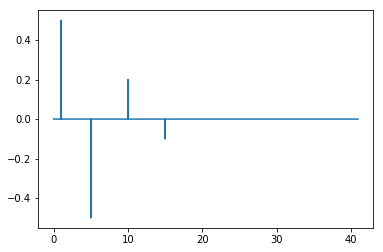

In [89]:
dt = 0.01 # define the time step
N = 4096 # total number of points
time = dt*np.arange(N) # define the time array

# Define a series of impulses
loading = np.zeros(N)
loading[np.where(time==1)] = 0.5
loading[np.where(time==5)] = -0.5
loading[np.where(time==10)] = 0.2
loading[np.where(time==15)] = -0.1

# Plot the loading function
plt.plot(time, loading)

## Compute the Fourier transform of the loading function

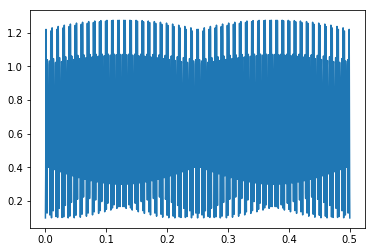

In [90]:
Sloading = np.fft.rfft(loading, N)
freq_loading = np.fft.rfftfreq(N)
plt.plot(freq_loading, np.abs(Sloading))
#plt.xlim((0, 0.1))

## Evaluate the frequency response function

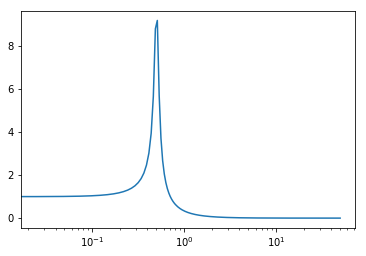

In [91]:
dt = 0.01 # define the time step
df = 1/(N*dt) # calculate the frequency step
freq = np.fft.rfftfreq(N, d=dt) # define the frequency array
freqratio = 2.*np.pi*freq/wn # frequency ratio

H = freqresponse(freqratio, zeta)

plt.semilogx(freq, np.abs(H))

## Evaluate the response

\begin{equation*}
U(\omega) = H(\omega)P(\omega)
\end{equation*}

\begin{equation*}
u(t) = IFT(U(\omega))
\end{equation*}



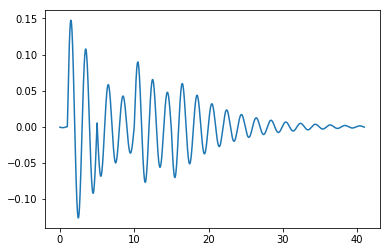

In [92]:
Sresponse = k*H*Sloading
response = np.fft.irfft(Sresponse)

plt.plot(time, response)